In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = lambda t:np.random.normal(10, 3, t)

In [3]:
population = model(30000)
population.shape

(30000,)

In [4]:
observation = population[np.random.randint(0,3000,1000)]
observation.shape

(1000,)

10.2759213961043

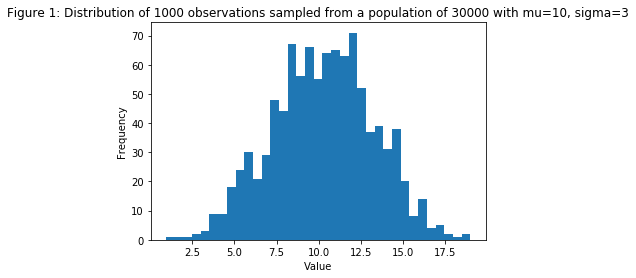

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(observation, bins=35)
ax.set_xlabel('Value')
ax.set_ylabel('Frequency')
ax.set_title('Figure 1: Distribution of 1000 observations sampled from a population of 30000 with mu=10, sigma=3')
mu_obs = observation.mean()
mu_obs

# <center>Transition model

$$ Q(\frac{\theta_{new}}{\theta_{current}}) = N(\theta_{current}, 1) $$

# <center>f proportional to the posterior

$$ f(d_i/\mu, \sigma^2)=\frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(d_i-\mu)^2}{2\sigma^2}} $$

假设期望值为常数$ \mu = \mu_{obs} $，待求参数$\theta$即标准差$\sigma$

新猜测参数的接受条件：

$$ \sum_i^n-nLog(\theta_{new}\sqrt{2\pi}) - \frac{(d_i-\mu_{obs})^2}{2\theta_{new}^2} + Log(prior(\mu_{obs}, \theta_{new}) $$ 
$$ > \sum_i^n-nLog(\theta_{current}\sqrt{2\pi}) - \frac{(d_i-\mu_{obs})^2}{2\theta_{current}^2} + Log(prior(\mu_{obs}, \theta_{current}) $$

In [6]:
transition_model = lambda x:[x[0], np.random.normal(x[1], 0.5, (1,))[0]]

In [7]:
def prior(x):
    
    # x[0]=mu, x[1]=sigma
    if x[1] <= 0:
        return 0
    
    return 1

In [8]:
def log_like_normal(x, data):
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi))-((data-x[0])**2) / (2*x[1]**2))

In [9]:
def acceptance(x, x_new):
    if x_new > x:
        return True
    else:
        accept = np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

In [10]:
def metropolis_hastings(likelihood, prior, transition_model, param_init, iterations, data, acceptance):
    
    x = param_init
    accepted = []
    rejected = []
    
    for i in range(iterations):
        x_new = transition_model(x)
        x_like = likelihood(x, data)
        x_new_like = likelihood(x_new, data)
        
        if (acceptance(x_like + np.log(prior(x)), x_new_like + np.log(prior(x_new)))):
            
            x = x_new
            accepted.append(x_new)
            
        else:
            rejected.append(x_new)
            
    return np.array(accepted), np.array(rejected)

In [11]:
accepted, rejected = metropolis_hastings(log_like_normal, prior, transition_model, [mu_obs, 0.1], 50000, observation, acceptance)

In [12]:
accepted.shape

(8379, 2)

In [13]:
rejected.shape

(41621, 2)

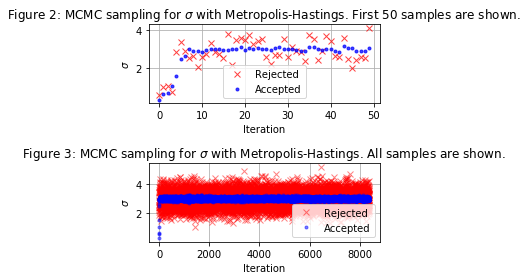

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)

ax1.plot(rejected[0:50,1], 'rx', label='Rejected', alpha=0.75)
ax1.plot(accepted[0:50,1], 'b.', label='Accepted', alpha=0.75)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('$\sigma$')
ax1.set_title('Figure 2: MCMC sampling for $\sigma$ with Metropolis-Hastings. First 50 samples are shown.')
ax1.grid()
ax1.legend()

ax2 = fig.add_subplot(2,1,2)
to_show = -accepted.shape[0]
ax2.plot(rejected[to_show:,1], 'rx', label='Rejected', alpha=0.5)
ax2.plot(accepted[to_show:,1], 'b.', label='Accepted', alpha=0.5)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$\sigma$')
ax2.set_title('Figure 3: MCMC sampling for $\sigma$ with Metropolis-Hastings. All samples are shown.')
ax2.grid()
ax2.legend()

fig.tight_layout()

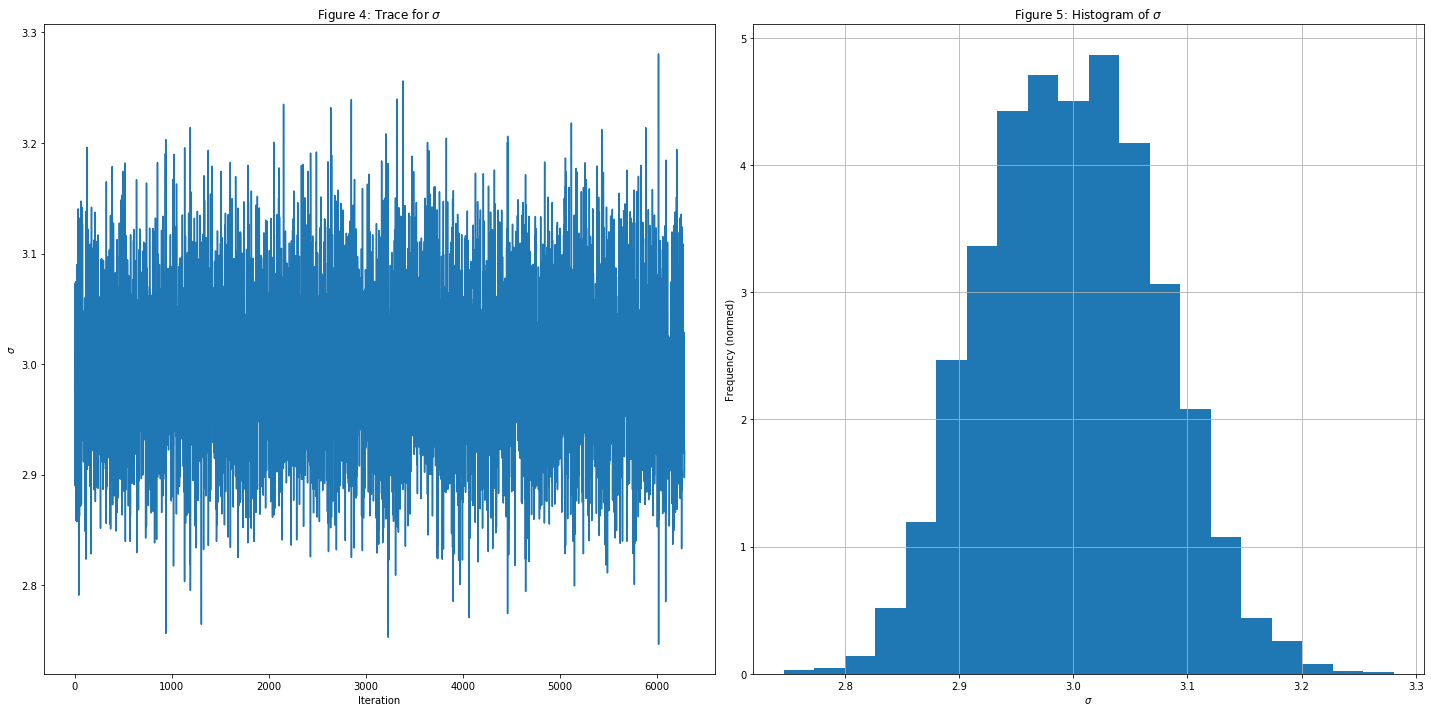

In [23]:
show=int(-0.75*accepted.shape[0])
hist_show=int(-0.75*accepted.shape[0])

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,2,1)
ax.plot(accepted[show:,1])
ax.set_title("Figure 4: Trace for $\sigma$")
ax.set_ylabel("$\sigma$")
ax.set_xlabel("Iteration")

ax2 = fig.add_subplot(1,2,2)
ax2.hist(accepted[hist_show:,1], bins=20,density=True)
ax2.set_ylabel("Frequency (normed)")
ax2.set_xlabel("$\sigma$")
ax2.set_title("Figure 5: Histogram of $\sigma$")
ax2.grid()

fig.tight_layout()